In [1633]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as sci
import scipy.misc as sci
%matplotlib inline

In [2216]:
import matplotlib as mpl
mpl.rc('image', cmap='gray')

In [2217]:
img = sci.imread('04.jpg')

/home/abhikcr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [2218]:
img_rshp = np.mean(sci.imresize(img, [256, 256]), axis = 2)

/home/abhikcr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


In [2219]:
img_rsp = img_rshp.copy()

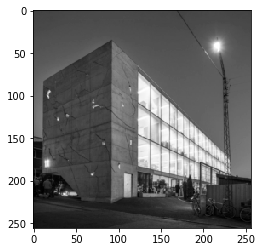

In [2220]:
plt.imshow(img_rsp)
plt.show()

In [2221]:
def gaussian(x, mu, lamda):
    return np.exp(np.dot((x-mu).T,np.dot(lamda, x-mu)))*np.sqrt(np.linalg.det(lamda/(2*np.pi)))

In [2222]:
def normalize_01(y):
    return (y - y.min())/(y.max() - y.min())

In [2223]:
def gaussian_calc(X, lam_1):
    
    N , D = X.shape
    mu = 0
    eye = np.eye(D)
    g_2 = np.diag(gaussian(X.T, mu, lam_1*eye))
    return g_2.T

In [2224]:
def convolve(imgn, kernel):
    
    size = kernel.shape[0]
    dims = imgn.shape[0] - size
    vals_1 = np.zeros((dims,dims))
    for i in range(dims):
        for j in range(dims):
            vals_1[i,j] = np.sum(kernel*imgn[i:i+size, j:j+size])
            
    return vals_1

In [2225]:
def conv_laplacian(img_s, X,  size, octaves = [.1,.5,1,5], norm = True):
    
    width ,height = img_s.shape
    
    images2return = []
    for z in range(len(octaves)-1):
        
        lap_eg_1 = gaussian_calc(X, octaves[z]).reshape(2*size+1,2*size+1)
        lap_eg_2 = gaussian_calc(X, octaves[z+1]).reshape(2*size+1,2*size+1)
        
        
        vals_1 = convolve(img_s, lap_eg_1)
        vals_2 = convolve(img_s, lap_eg_2)

        lap_img_1= normalize_01(vals_1)*255
        lap_img_2= normalize_01(vals_2)*255
        lap_img = (lap_img_1 - lap_img_2)
    
        if(norm):
            img = normalize_01(lap_img)*255
            
        images2return.append(img)
        
    return images2return

In [2306]:
def find_local_maximas(imgs, thd):
    imgs = imgs/imgs.max()
    a = -0.125
    loc_max_filter = np.array([[-a,-a,-a],[-a,1,-a],[-a,-a,-a]])
    img_loc_max = convolve(imgs, loc_max_filter)
    img_loc_max = normalize_01(img_loc_max)
    return (img_loc_max>thd)*255

In [2307]:
def find_local_maxima_scale(imgs, thd):
    
    img_max = None
    for img in imgs:
        img_n = normalize_01(img)
        img_loc_max = find_local_maximas((img_n>thd)*255, thd)
        if(img_max is None):
            img_max = img_loc_max
        else:
            img_max = np.max(np.stack([img_loc_max,img_max]), axis=0)
    
    return img_max

In [2308]:
size = 3

In [2309]:
rng = np.arange(-size,size+1)

In [2310]:
mat = np.meshgrid(rng,rng)

In [2311]:
X = np.hstack([mat[0].reshape(-1,1), mat[1].reshape(-1,1)])

In [2343]:
img_convd = conv_laplacian(img_rsp, X, size, octaves = [0.00001,0.0001,0.001,0.01,0.1,1,10])

In [2349]:
img_loc_max = find_local_maxima_scale(img_convd, 0.65)

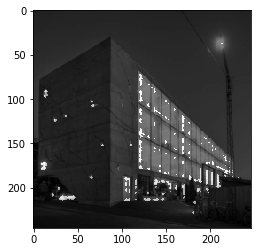

In [2350]:
plt.imshow(img_loc_max*1 + img_rsp[5:-5,5:-5])
plt.show()

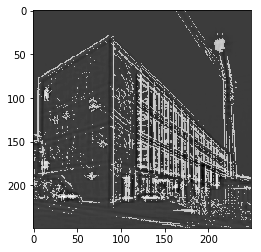

In [2358]:
plt.imshow((img_convd[5]>140)*255 + img_convd[0])
plt.show()